# 新手教程—收益率计算

以下内容主要介绍收益率计算

## 1 收益率计算

In [9]:
#导入需要的程序包
import pandas as pd
import seaborn as sns

from jqdatasdk import *

In [10]:
# auth('ID','Password')

auth('13811550483','security421S')
pd.set_option('display.max_rows', 10)

In [11]:
#df = get_price(get_industry_stocks('A01'), start_date='2018-01-01', fields=('close',))['close']

df = get_price(get_industry_stocks('A01'), fields=('close',))['close']
df.head()

,000998.XSHE,002041.XSHE,002772.XSHE,300087.XSHE,300189.XSHE,300511.XSHE,600108.XSHG,600313.XSHG,600354.XSHG,600359.XSHG,600371.XSHG,600506.XSHG,600540.XSHG,600598.XSHG,600672.XSHG,600762.XSHG,601118.XSHG
2015-01-05,19.07,12.71,NaN,3.94,2.71,NaN,9.51,4.50,8.81,10.92,10.13,11.33,6.28,9.02,NaN,NaN,8.86
2015-01-06,19.45,12.92,NaN,4.07,2.78,NaN,9.75,4.62,8.75,11.08,10.28,11.62,6.39,9.31,NaN,NaN,9.13
2015-01-07,19.30,12.85,NaN,4.03,2.76,NaN,9.98,4.70,8.85,11.07,10.27,11.54,6.37,9.34,NaN,NaN,9.01
2015-01-08,19.83,13.03,NaN,4.12,2.77,NaN,9.77,4.74,8.89,11.12,10.33,11.81,6.39,9.36,NaN,NaN,8.83
2015-01-09,19.47,12.87,NaN,4.01,2.72,NaN,9.41,4.59,8.60,10.80,10.05,11.73,6.30,9.24,NaN,NaN,8.59


In [12]:
rets = df/df.shift(1) - 1#shift起平移作用
rets.head()

,000998.XSHE,002041.XSHE,002772.XSHE,300087.XSHE,300189.XSHE,300511.XSHE,600108.XSHG,600313.XSHG,600354.XSHG,600359.XSHG,600371.XSHG,600506.XSHG,600540.XSHG,600598.XSHG,600672.XSHG,600762.XSHG,601118.XSHG
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,0.019927,0.016522,NaN,0.032995,0.025830,NaN,0.025237,0.026667,-0.006810,0.014652,0.014808,0.025596,0.017516,0.032151,NaN,NaN,0.030474
2015-01-07,-0.007712,-0.005418,NaN,-0.009828,-0.007194,NaN,0.023590,0.017316,0.011429,-0.000903,-0.000973,-0.006885,-0.003130,0.003222,NaN,NaN,-0.013143
2015-01-08,0.027461,0.014008,NaN,0.022333,0.003623,NaN,-0.021042,0.008511,0.004520,0.004517,0.005842,0.023397,0.003140,0.002141,NaN,NaN,-0.019978
2015-01-09,-0.018154,-0.012279,NaN,-0.026699,-0.018051,NaN,-0.036847,-0.031646,-0.032621,-0.028777,-0.027106,-0.006774,-0.014085,-0.012821,NaN,NaN,-0.027180


In [13]:
returns = df.pct_change().dropna()
returns.head()

,000998.XSHE,002041.XSHE,002772.XSHE,300087.XSHE,300189.XSHE,300511.XSHE,600108.XSHG,600313.XSHG,600354.XSHG,600359.XSHG,600371.XSHG,600506.XSHG,600540.XSHG,600598.XSHG,600672.XSHG,600762.XSHG,601118.XSHG


In [14]:
# pandas.ols在0.20已被移除
## 2 移动窗口回归
# 使用普通最小二乘法(OLS)拟合曲线，得到回归系数及各类参数
# y = returns['300087.XSHE']
# x = returns.ix[:, ['300189.XSHE']]
# model = pd.ols(y=y, x=x)
# model
# model = pd.ols(y=y, x=x, window=5)
# model.beta.info()
# model.beta['300189.XSHE'].plot()
# 画出移动平均线、指数平滑移动平均线进行分析

In [15]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

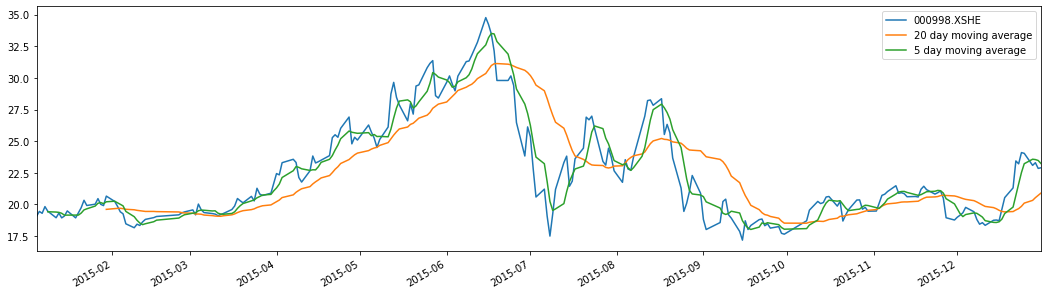

In [16]:
df = get_price(get_industry_stocks('A01'), fields=('close',))['close']
plt.figure(figsize=[18,5])
df['000998.XSHE'].plot()
#pd.Series.rolling((df['000998.XSHE'],20).mean()).plot(label='20 day moving average')
#pd.Series.rolling((df['000998.XSHE'],5).mean()).plot(label='5 day moving average')
df['000998.XSHE'].rolling(window=20).mean().plot(label='20 day moving average')
df['000998.XSHE'].rolling(window=5).mean().plot(label='5 day moving average')
plt.legend(loc='best')

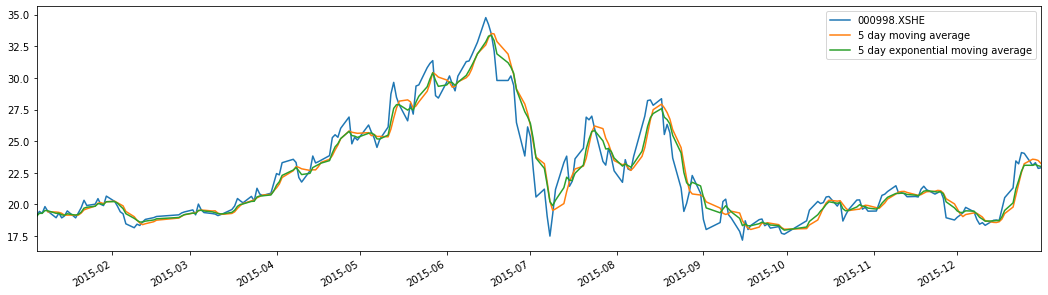

In [30]:
df = get_price(get_industry_stocks('A01'), fields=('close',))['close']
plt.figure(figsize=[18,5])
df['000998.XSHE'].plot()
#pd.Series.rolling(df['000998.XSHE'],20).plot(label='5 day moving average')
df['000998.XSHE'].rolling(window=5).mean().plot(label='5 day moving average')
#pd.ewma(df['000998.XSHE'],5).plot(label='5 day exponential moving average')
df['000998.XSHE'].ewm(span=5).mean().plot(label='5 day exponential moving average')
plt.legend(loc='best')

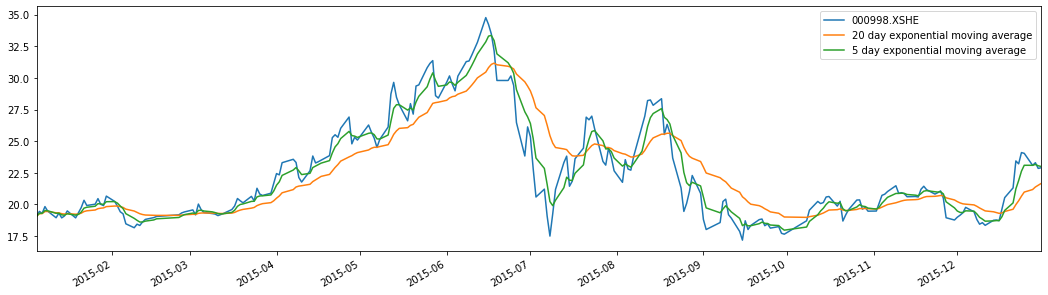

In [31]:
df = get_price(get_industry_stocks('A01'), fields=('close',))['close']
plt.figure(figsize=[18,5])
df['000998.XSHE'].plot()
#pd.DataFrame.ewm(df['000998.XSHE'],20).plot(label='20 day exponential moving average')
#pd.DataFrame.ewm(df['000998.XSHE'],5).plot(label='5 day exponential moving average')
df['000998.XSHE'].ewm(span=20).mean().plot(label='20 day exponential moving average')
df['000998.XSHE'].ewm(span=5).mean().plot(label='5 day exponential moving average')
plt.legend(loc='best')